In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [4]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
X = pd.DataFrame(X, columns = diabetes.feature_names)

y_binary = (y > np.median(y)).astype(int)

In [5]:
print(y[:2])
print(y_binary[:2])
print(np.median(y))
X[:2]

[151.  75.]
[1 0]
140.5


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.4, random_state=42
)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
model = LogisticRegression(max_iter=300, tol = 0.001, verbose=1, solver='liblinear')
model.fit(X_train, y_train)

[LibLinear]

LogisticRegression(max_iter=300, solver='liblinear', tol=0.001, verbose=1)

In [9]:
y_pred = model.predict(X_test)#
accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)

79.09604519774011


In [10]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[72 19]
 [18 68]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        91
           1       0.78      0.79      0.79        86

    accuracy                           0.79       177
   macro avg       0.79      0.79      0.79       177
weighted avg       0.79      0.79      0.79       177



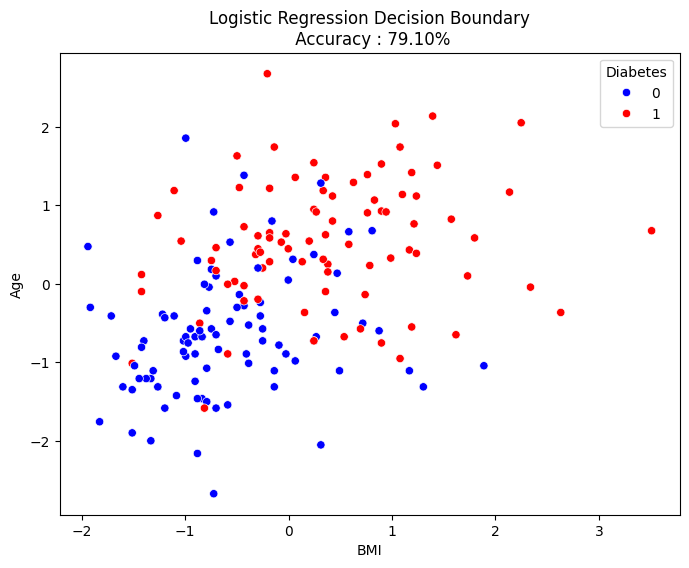

In [12]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = X_test[:,2], y= X_test[:,8], hue = y_test, palette={0: 'blue', 1 : 'red'}, marker = 'o')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('Logistic Regression Decision Boundary\n Accuracy : {:.2f}%'.format(accuracy * 100))
plt.legend(title = 'Diabetes', loc = 'upper right')
plt.show()

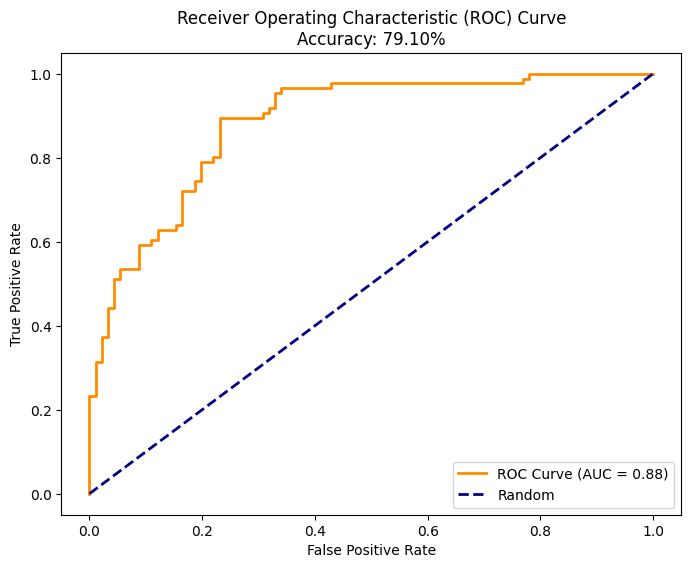

In [13]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
		label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
	accuracy * 100))
plt.legend(loc="lower right")
plt.show()
